___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to "***Fraud Detection Project***". This is the last project of the Capstone Series.

One of the challenges in this project is the absence of domain knowledge. So without knowing what the column names are, you will only be interested in their values. The other one is the class frequencies of the target variable are quite imbalanced.

You will implement ***Logistic Regression, Random Forest, Neural Network*** algorithms and ***SMOTE*** technique. Also visualize performances of the models using ***Seaborn, Matplotlib*** and ***Yellowbrick*** in a variety of ways.

At the end of the project, you will have the opportunity to deploy your model by ***Streamlit API***.

Before diving into the project, please take a look at the Determines and Tasks.

- ***NOTE:*** *This tutorial assumes that you already know the basics of coding in Python and are familiar with model deployement (streamlit api) as well as the theory behind Logistic Regression, Random Forest, Neural Network.*



---
---


# #Determines
The datasets contains transactions made by credit cards in September 2013 by european cardholders. This dataset presents transactions that occurred in two days, where it has **492 frauds** out of **284,807** transactions. The dataset is **highly unbalanced**, the positive class (frauds) account for 0.172% of all transactions.

**Feature Information:**

**Time**: This feature is contains the seconds elapsed between each transaction and the first transaction in the dataset. 

**Amount**:  This feature is the transaction Amount, can be used for example-dependant cost-senstive learning. 

**Class**: This feature is the target variable and it takes value 1 in case of fraud and 0 otherwise.

---

The aim of this project is to predict whether a credit card transaction is fraudulent. Of course, this is not easy to do.
First of all, you need to analyze and recognize your data well in order to draw your roadmap and choose the correct arguments you will use. Accordingly, you can examine the frequency distributions of variables. You can observe variable correlations and want to explore multicollinearity. You can show the distribution of the target variable's classes over other variables. 
Also, it is useful to take missing values and outliers.

After these procedures, you can move on to the model building stage by doing the basic data pre-processing you are familiar with. 

Start with Logistic Regression and evaluate model performance. You will apply the SMOTE technique used to increase the sample for unbalanced data. Next, rebuild your Logistic Regression model with SMOTE applied data to observe its effect.

Then, you will use three different algorithms in the model building phase. You have applied Logistic Regression and Random Forest in your previous projects. However, the Deep Learning Neural Network algorithm will appear for the first time.

In the final step, you will deploy your model using ***Streamlit API***. 

**Optional**: You can Dockerize your project and deploy on cloud.

---
---


# #Tasks

#### 1. Exploratory Data Analysis & Data Cleaning

- Import Modules, Load Data & Data Review
- Exploratory Data Analysis
- Data Cleaning



    
#### 2. Data Preprocessing

- Scaling
- Train - Test Split


#### 3. Model Building

- Logistic Regression without SMOTE
- Apply SMOTE
- Logistic Regression with SMOTE
- Random Forest Classifier with SMOTE
- Neural Network

#### 4. Model Deployement

- Save and Export the Model as .pkl
- Save and Export Variables as .pkl 




---
---


## 1. Exploratory Data Analysis & Data Cleaning

### Import Modules, Load Data & Data Review

In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install colorama
!pip install pyforest

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for pyforest: filename=pyforest-1.1.0-py2.py3-none-any.whl size=14607 sha256=1d0395f0f1357381c371558c3ec9519f6d7ed648b3af3db7b4fcdc3fa8e6cfea
  Stored in directory: /root/.cache/pip/wheels/61/1c/da/48e6c884142d485475d852d69d20a096aba5beceb338822893
Successfully built pyforest


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import colorama
from colorama import Fore, Style
from termcolor import colored
from EDA import first_looking, duplicate_values, missing_values # we created this local module.

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, cross_validate
from sklearn.metrics import plot_confusion_matrix, classification_report, confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import make_scorer, precision_score, precision_recall_curve, plot_precision_recall_curve, plot_roc_curve, roc_auc_score, roc_curve, f1_score, accuracy_score, recall_score
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectPercentile, f_classif, f_regression, mutual_info_regression
from sklearn.pipeline import Pipeline
from sklearn.tree import plot_tree
from sklearn.model_selection import StratifiedKFold
from MLscores import matris_scorer, model_scorer # we created this local module.

import plotly.express as px
import pyforest

#importing plotly and cufflinks in offline mode
!pip install cufflinks
import cufflinks as cf
import plotly.offline
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

import warnings
warnings.filterwarnings('ignore')
warnings.warn("this will not show")
plt.rcParams["figure.figsize"] = (10,6)
pd.set_option('max_colwidth',200)

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 200)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
sns.set_palette("Set2")


In [9]:
# df = pd.read_csv("/content/drive/MyDrive/Data/Proje3/1/creditcard.csv")
df = pd.read_csv("creditcard.part1/creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.000,-1.360,-0.073,2.536,1.378,-0.338,0.462,0.240,0.099,0.364,0.091,-0.552,-0.618,-0.991,-0.311,1.468,-0.470,0.208,0.026,0.404,0.251,-0.018,0.278,-0.110,0.067,0.129,-0.189,0.134,-0.021,149.620,0
1,0.000,1.192,0.266,0.166,0.448,0.060,-0.082,-0.079,0.085,-0.255,-0.167,1.613,1.065,0.489,-0.144,0.636,0.464,-0.115,-0.183,-0.146,-0.069,-0.226,-0.639,0.101,-0.340,0.167,0.126,-0.009,0.015,2.690,0
2,1.000,-1.358,-1.340,1.773,0.380,-0.503,1.800,0.791,0.248,-1.515,0.208,0.625,0.066,0.717,-0.166,2.346,-2.890,1.110,-0.121,-2.262,0.525,0.248,0.772,0.909,-0.689,-0.328,-0.139,-0.055,-0.060,378.660,0
3,1.000,-0.966,-0.185,1.793,-0.863,-0.010,1.247,0.238,0.377,-1.387,-0.055,-0.226,0.178,0.508,-0.288,-0.631,-1.060,-0.684,1.966,-1.233,-0.208,-0.108,0.005,-0.190,-1.176,0.647,-0.222,0.063,0.061,123.500,0
4,2.000,-1.158,0.878,1.549,0.403,-0.407,0.096,0.593,-0.271,0.818,0.753,-0.823,0.538,1.346,-1.120,0.175,-0.451,-0.237,-0.038,0.803,0.409,-0.009,0.798,-0.137,0.141,-0.206,0.502,0.219,0.215,69.990,0


In [10]:
first_looking(df)

Shape:(284807, 31)
There is 284807 observation and 31 columns in the dataset.
-------------------------------------------------------------------------------

Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 

In [ ]:
# there is no missing values.

In [11]:
df[df.duplicated()]["class"].value_counts()

0    1062
1      19
Name: class, dtype: int64

In [12]:
duplicate_values(df[df["class"]==0]) # the dataset is already imbalanced. So we decided to drop only "0"s.

1062 duplicates were dropped
-------------------------------------------------------------------------------


### Exploratory Data Analysis

In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
time,284807.000,94813.860,47488.146,0.000,54201.500,84692.000,139320.500,172792.000
v1,284807.000,0.000,1.959,-56.408,-0.920,0.018,1.316,2.455
v2,284807.000,0.000,1.651,-72.716,-0.599,0.065,0.804,22.058
v3,284807.000,-0.000,1.516,-48.326,-0.890,0.180,1.027,9.383
v4,284807.000,0.000,1.416,-5.683,-0.849,-0.020,0.743,16.875
v5,284807.000,0.000,1.380,-113.743,-0.692,-0.054,0.612,34.802
v6,284807.000,0.000,1.332,-26.161,-0.768,-0.274,0.399,73.302
v7,284807.000,-0.000,1.237,-43.557,-0.554,0.040,0.570,120.589
v8,284807.000,0.000,1.194,-73.217,-0.209,0.022,0.327,20.007
v9,284807.000,-0.000,1.099,-13.434,-0.643,-0.051,0.597,15.595


In [14]:
# v1-v28 represents normal distribution (~0 mean and ~1 std)
# Time is between 0 and 172792 >> within 1 day 23 hours 59 minutes 52 seconds

### Data Cleaning
Check Missing Values and Outliers

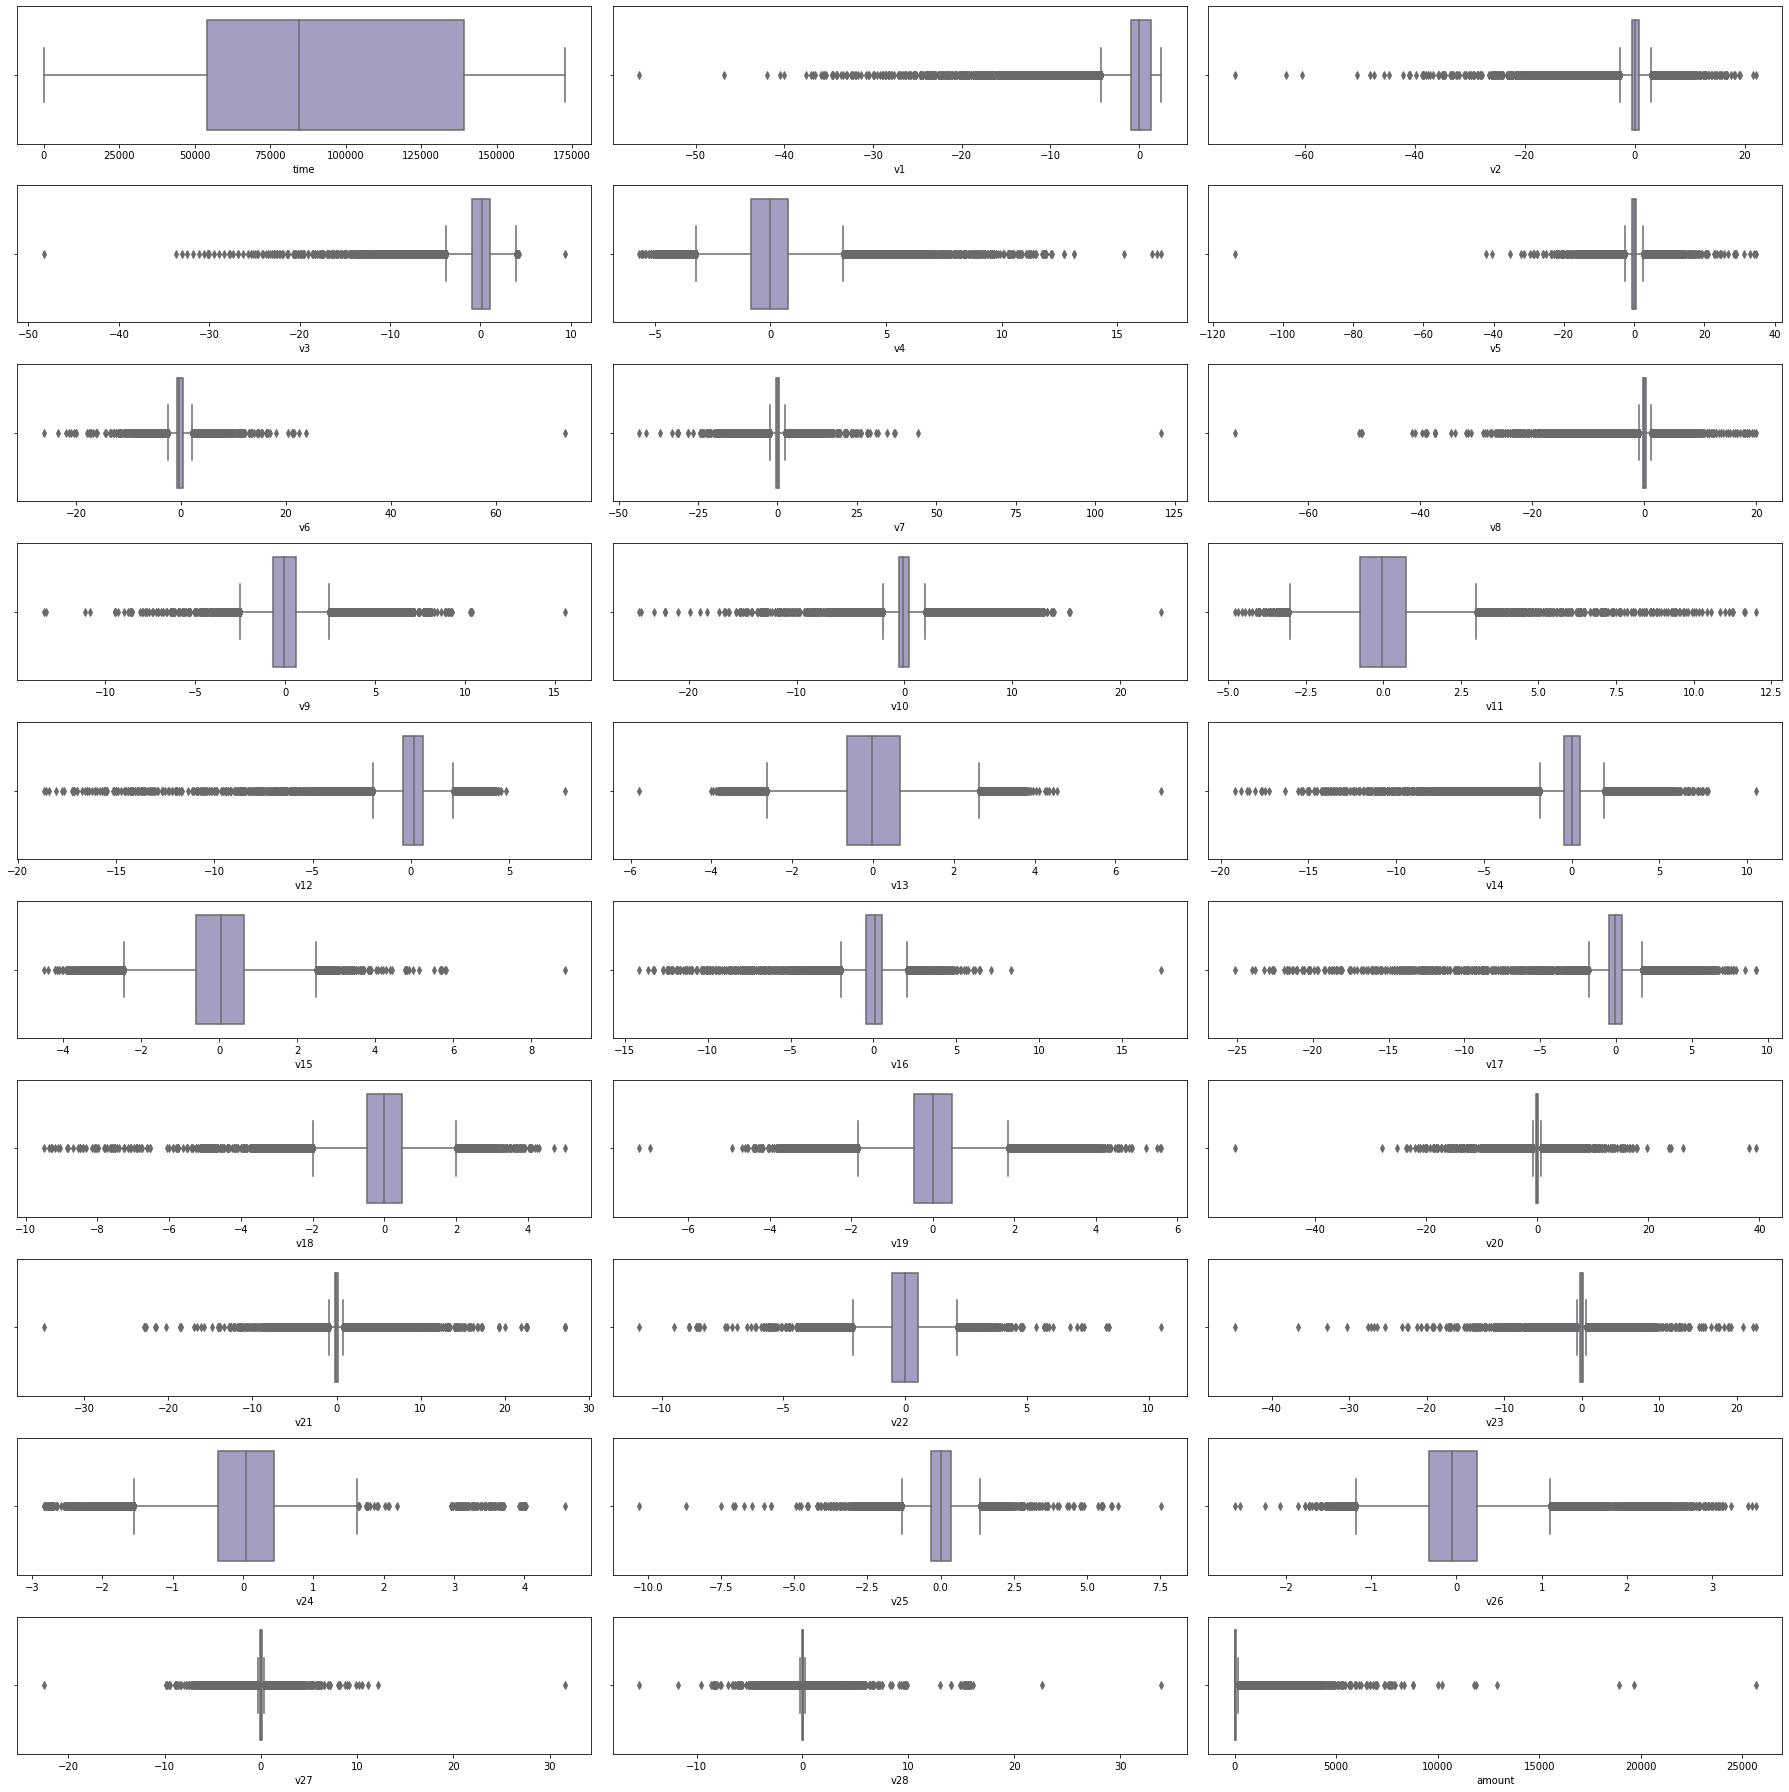

In [15]:
index = 0
plt.figure(figsize=(25,25))
for feature in df:
    if feature != "class":
        index += 1
        plt.subplot(10, 3, index)
        sns.boxplot(x=feature ,palette="Purples", data=df)
plt.tight_layout()

In [16]:
# there are outliers but should we drop them? they have outliers but v1-28 represent normal distribution.
# we can scale with robust scaler.

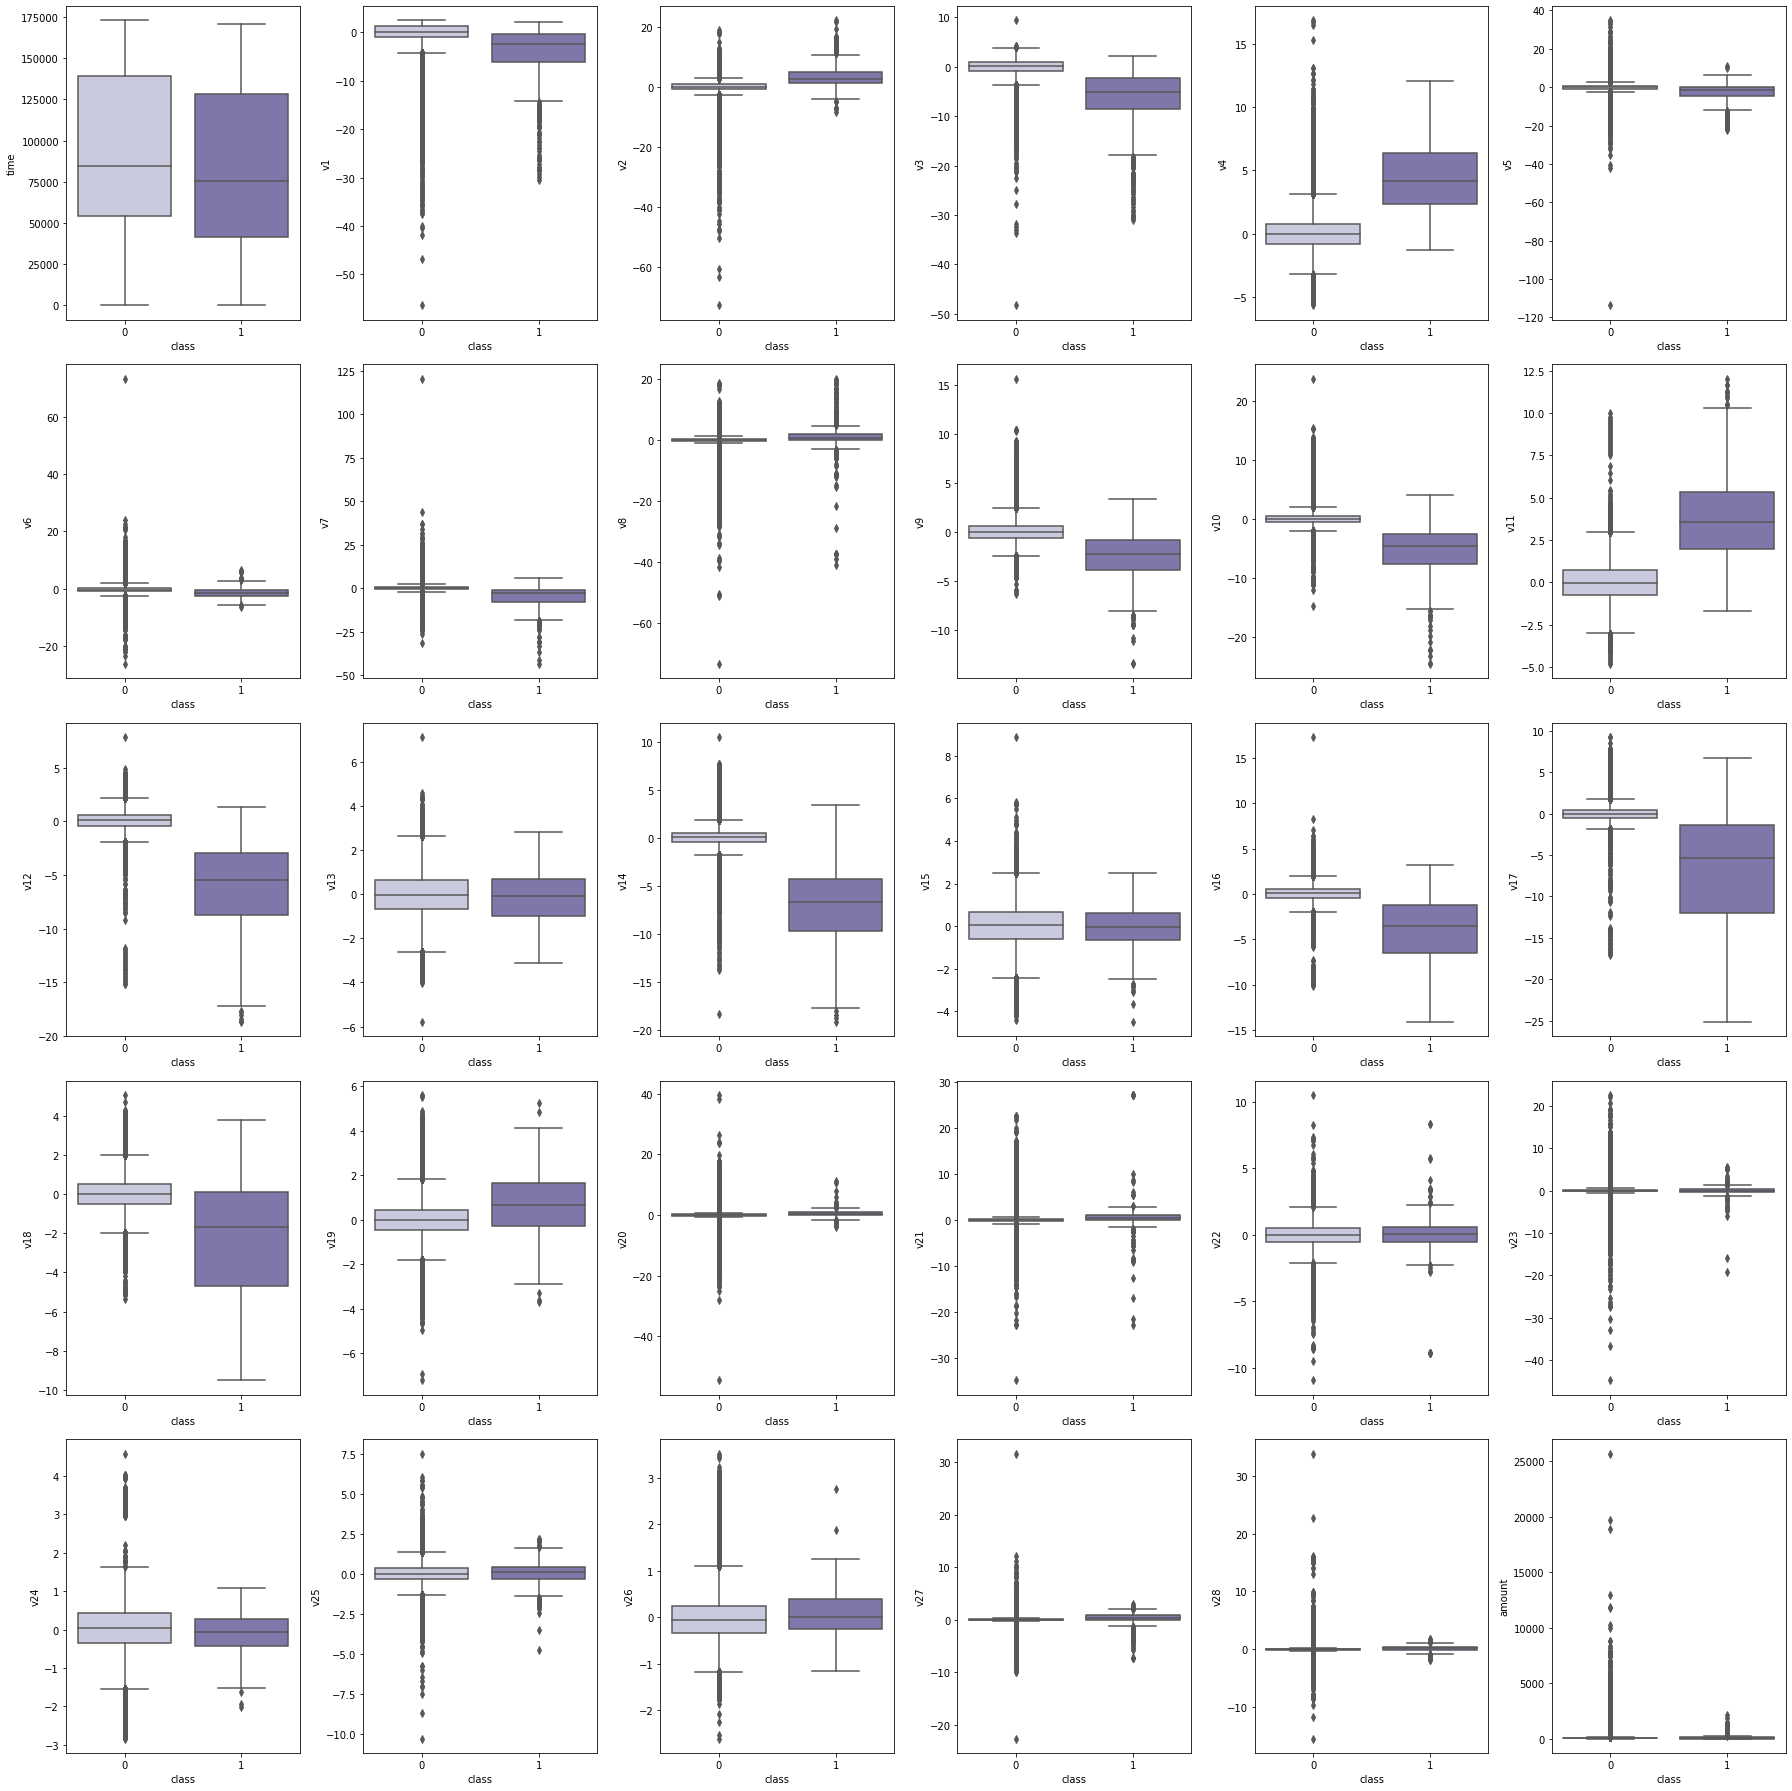

In [17]:
index = 0
plt.figure(figsize=(25,25))
for feature in df:
    if feature != "class":
        index += 1
        plt.subplot(5,6, index)
        sns.boxplot(x='class',palette="Purples",y=feature, data=df)
plt.tight_layout()

In [18]:
# all the medians of real transactions are almost 0, but the medians of fraudulent transactions vary.

In [19]:
# real transactions have extreme amounts but fraudulent transactions have higher mean amount.

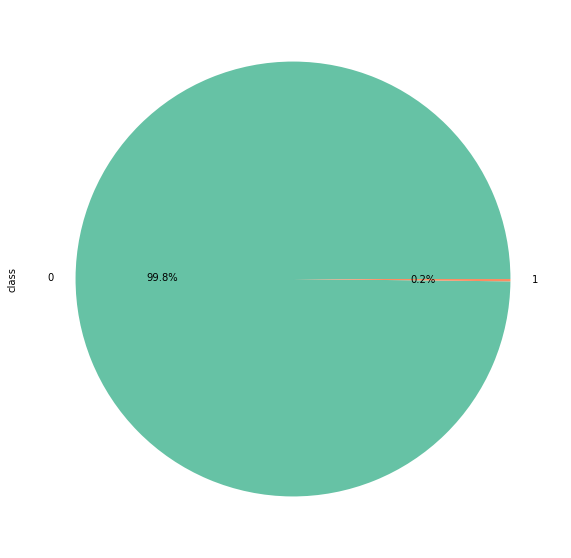

In [20]:
df["class"].value_counts().plot(kind="pie", autopct='%1.1f%%', figsize=(10,10));

In [21]:
# highly unbalanced target column.

''

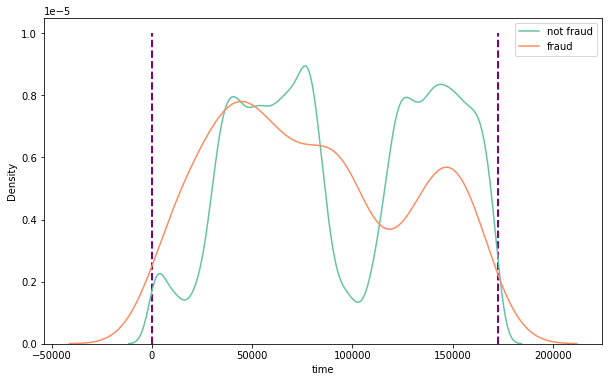

In [22]:
#the distribution of transactions over time in the fraudulent and non-fraudulent categories.

sns.distplot(df[df["class"]==0]["time"], hist=False, label="not fraud")
sns.distplot(df[df["class"]==1]["time"], hist=False, label="fraud")
plt.legend()

plt.vlines(x=[0, 172792], ymin=0 , ymax=0.00001, colors='purple', ls='--', lw=2)
;

''

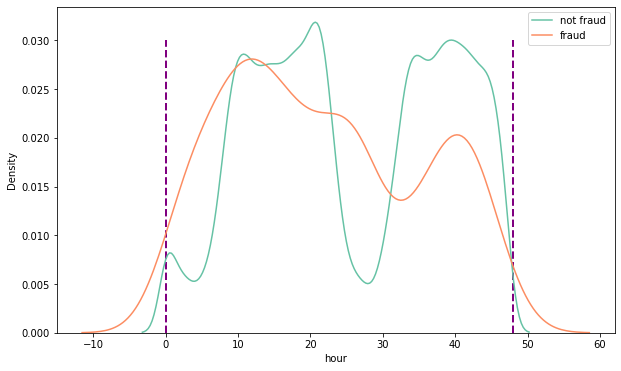

In [23]:
# for better insight, we create new column as hour.

df['hour'] = df['time'].apply(lambda x: np.floor(x / 3600))

sns.distplot(df[df["class"]==0]["hour"], hist=False,  label="not fraud")
sns.distplot(df[df["class"]==1]["hour"], hist=False, label="fraud")
plt.legend()
plt.vlines(x=[0, 48], ymin=0 , ymax=0.03, colors='purple', ls='--', lw=2)
;

In [24]:
# the low density parts of non-fraudulent transactions can be at night. fraudulent transactions are not so affected by time. 

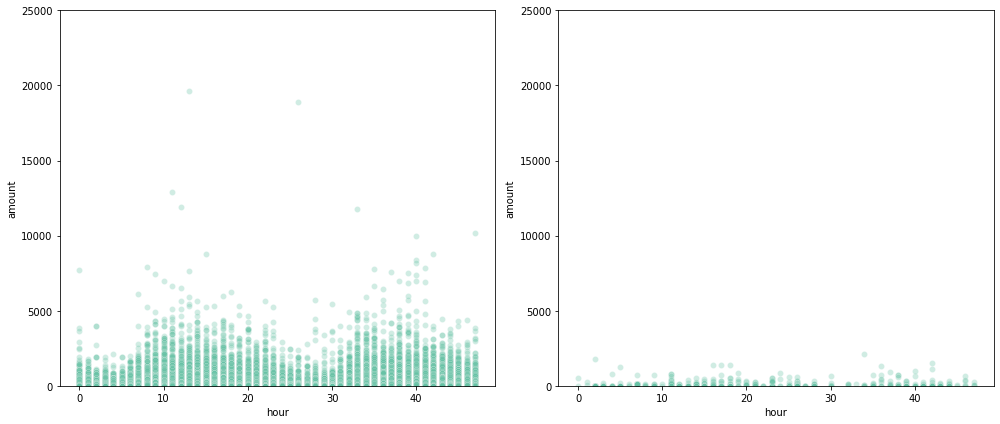

In [25]:
# the amount of transactions over time.

fig, ax = plt.subplots(1,2, figsize=(14,6))
sns.scatterplot(df[df["class"]==0]["hour"], df["amount"], alpha=0.3, ax=ax[0])
sns.scatterplot(df[df["class"]==1]["hour"], df["amount"], alpha=0.3, ax=ax[1])
ax[0].set_ylim(ymin=0, ymax=25000)
ax[1].set_ylim(ymin=0, ymax=25000)
plt.tight_layout();

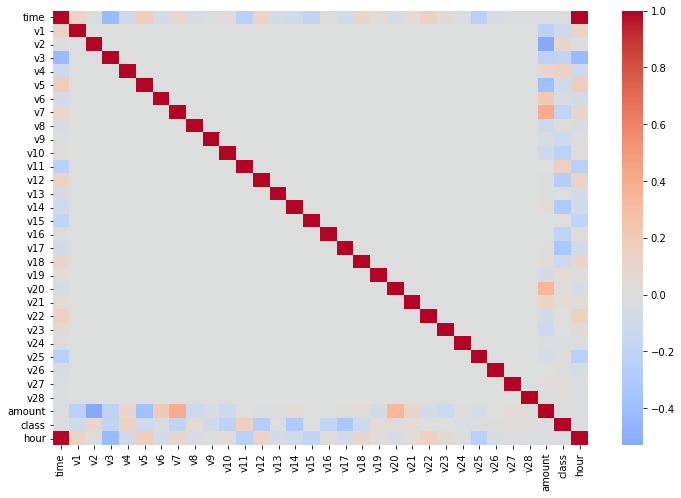

In [26]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), center=0, cmap="coolwarm")

In [27]:
# let's look at the scatterplots of the variables which have strog correlation between them:
# we decided to look at just them instead of using pairplot to avoid complexity and time loss.

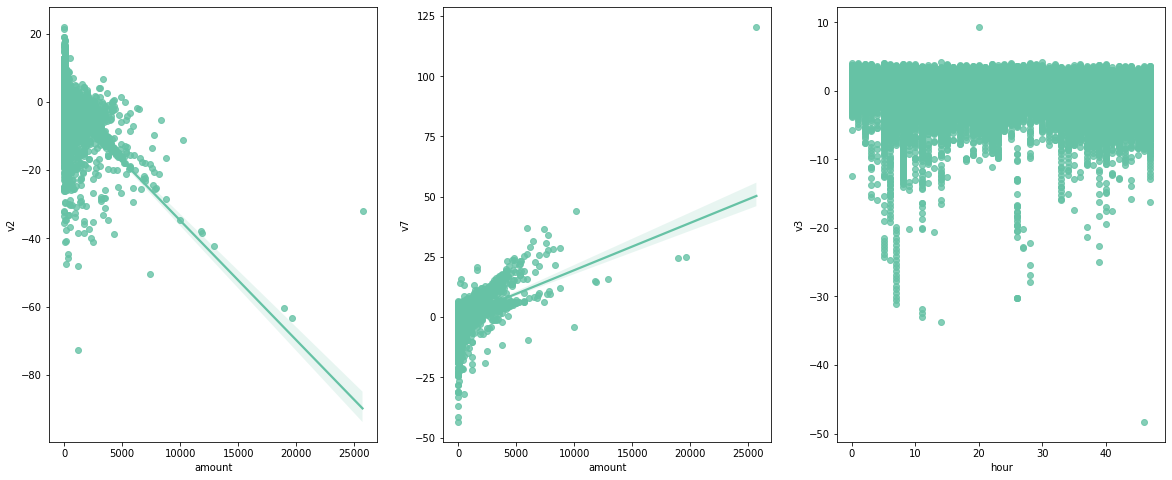

In [28]:
fig, ax= plt.subplots(1,3, figsize=(20,8))

sns.regplot(df["amount"], df["v2"], ax=ax[0])
sns.regplot(df["amount"], df["v7"], ax=ax[1])
sns.regplot(df["hour"], df["v3"], ax=ax[2]);


---
---


## 2. Data Preprocessing

#### Train - Test Split

As in this case, for extremely imbalanced datasets you may want to make sure that classes are balanced across train and test data.

In [29]:
df.dropna(axis=0, inplace=True)

In [30]:
X = df.drop(columns=["class","hour"])
y = df["class"]

#### Scaling

In [31]:
# there are outliers. so we decided to use robust scaler.
scaler = RobustScaler()

---
---


## 3. Model Building
It was previously stated that you need to make class prediction with three different algorithms. As in this case, different approaches are required to obtain better performance on unbalanced data.

This dataset is severely **unbalanced** (most of the transactions are non-fraud). So the algorithms are much more likely to classify new observations to the majority class and high accuracy won't tell us anything. To address the problem of imbalanced dataset we can use undersampling and oversampling data approach techniques. Oversampling increases the number of minority class members in the training set. The advantage of oversampling is that no information from the original training set is lost unlike in undersampling, as all observations from the minority and majority classes are kept. On the other hand, it is prone to overfitting. 

There is a type of oversampling called **[SMOTE](https://www.geeksforgeeks.org/ml-handling-imbalanced-data-with-smote-and-near-miss-algorithm-in-python/)** (Synthetic Minority Oversampling Technique), which we are going to use to make our dataset balanced. It creates synthetic points from the minority class.

- It is important that you can evaluate the effectiveness of SMOTE. For this reason, implement the Logistic Regression algorithm in two different ways, with SMOTE applied and without.

***Note***: 

- *Do not forget to import the necessary libraries and modules before starting the model building!*

- *If you are going to use the cross validation method to be more sure of the performance of your model for unbalanced data, you should make sure that the class distributions in the iterations are equal. For this case, you should use **[StratifiedKFold](https://www.analyseup.com/python-machine-learning/stratified-kfold.html)** instead of regular cross validation method.*

### Logistic Regression without SMOTE

- The steps you are going to cover for this algorithm are as follows: 

   i. Import Libraries
   
   *ii. Model Training*
   
   *iii. Prediction and Model Evaluating*
   
   *iv. Plot Precision and Recall Curve*
   
   *v. Apply and Plot StratifiedKFold*

***i. Import Libraries***

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42, stratify=y)
# we used stratify=y because of imbalanced dataset.

In [34]:
X_train_scaled = scaler.fit_transform(X_train) 

X_test_scaled = scaler.transform(X_test)

***ii. Model Training***

In [35]:
log_model = LogisticRegression(random_state= 42)

In [36]:
log_model.fit(X_train_scaled, y_train)

LogisticRegression(random_state=42)

***iii. Prediction and Model Evaluating***

In [37]:
train_pred = log_model.predict(X_train_scaled)

test_pred = log_model.predict(X_test_scaled)

In [38]:
matris_scorer(log_model, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set
[[85280    15]
 [   55    93]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.86      0.63      0.73       148

    accuracy                           1.00     85443
   macro avg       0.93      0.81      0.86     85443
weighted avg       1.00      1.00      1.00     85443


Train_Set
[[198991     29]
 [   122    222]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    199020
           1       0.88      0.65      0.75       344

    accuracy                           1.00    199364
   macro avg       0.94      0.82      0.87    199364
weighted avg       1.00      1.00      1.00    199364



In [39]:
model_scorer(log_model, X_train_scaled, y_train, X_test_scaled, y_test)

,train_set,test_set
Accuracy,0.999,0.999
Precision,0.884,0.861
Recall,0.645,0.628
f1,0.746,0.727


In [ ]:
# it seems like there is not overfitting.


You're evaluating "accuracy score"? Is your performance metric reflect real success? You may need to use different metrics to evaluate performance on unbalanced data. You should use **[precision and recall metrics](https://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html#:~:text=The%20precision%2Drecall%20curve%20shows,a%20low%20false%20negative%20rate.)**.

***iv. Plot Precision and Recall Curve***


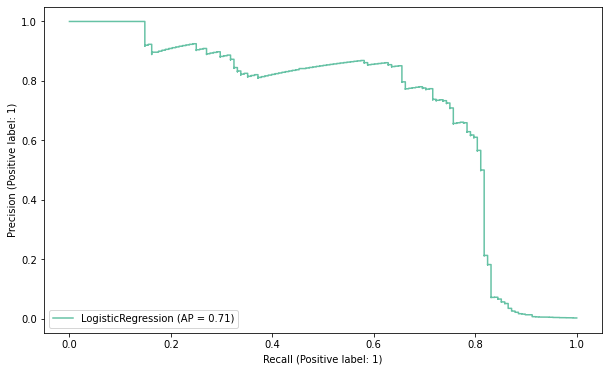

In [40]:
plot_precision_recall_curve(log_model, X_test_scaled, y_test);

In [41]:
log_default_f1 = f1_score(y_test, test_pred)
log_default_recall = recall_score(y_test,test_pred)
log_default_auc = roc_auc_score(y_test, test_pred)

***v. Apply StratifiedKFold***

In [42]:
from sklearn.model_selection import StratifiedKFold 

In [43]:
y_pred_proba = log_model.predict_proba(X_test_scaled)

In [44]:
precisions, recalls, thresholds = precision_recall_curve(test_pred, y_pred_proba[:,1])

In [45]:
# probability treshold.
optimal_idx = np.argmax((2 * precisions * recalls) / (precisions + recalls))
optimal_threshold = thresholds[optimal_idx]
optimal_threshold

0.5017494283146849

In [46]:
   
# It determines the index numbers according to how many parts we want to divide the model into.
# with this function, we will see the average evaluating values according to optimal_threshold.

def kfold(n, mdl, X, y, optimal_threshold):
    skf = StratifiedKFold(n_splits = n, shuffle = True, random_state = 42)
    acc_scores = []
    pre_scores = []
    rec_scores = []
    f1_scores  = []
    
    X = X.reset_index(drop=True)       # To reset index numbers after each operation.
    y = y.reset_index(drop=True)
    
    for train_index, test_index in skf.split(X, y):
        
        X_train = X.loc[train_index]
        y_train = y.loc[train_index]
        X_test = X.loc[test_index]
        y_test = y.loc[test_index]
        
        
        mdl = mdl
        mdl.fit(X_train, y_train)
        y_pred = mdl.predict(X_test)
        y_pred_proba = mdl.predict_proba(X_test)
             
        y_pred2 = pd.Series(y_pred_proba[:,1]).apply(lambda x : 1 if x >= optimal_threshold else 0)
        
        acc_scores.append(accuracy_score(y_test, y_pred2))
        pre_scores.append(precision_score(y_test, y_pred2, pos_label=1))
        rec_scores.append(recall_score(y_test, y_pred2, pos_label=1))
        f1_scores.append(f1_score(y_test, y_pred2, pos_label=1))
    
    print(f'Accuracy {np.mean(acc_scores)*100:>10,.2f}%  std {np.std(acc_scores)*100:.2f}%')
    print(f'Precision-1 {np.mean(pre_scores)*100:>7,.2f}%  std {np.std(pre_scores)*100:.2f}%')
    print(f'Recall-1 {np.mean(rec_scores)*100:>10,.2f}%  std {np.std(rec_scores)*100:.2f}%')
    print(f'F1_score-1 {np.mean(f1_scores)*100:>8,.2f}%  std {np.std(f1_scores)*100:.2f}%')

In [47]:
kfold(10, log_model, pd.DataFrame(X_train_scaled), y_train, 0.5)

Accuracy      99.92%  std 0.02%
Precision-1   87.42%  std 6.86%
Recall-1      64.25%  std 8.73%
F1_score-1    73.68%  std 6.77%


In [48]:
kfold(10, log_model, pd.DataFrame(X_train_scaled), y_train, optimal_threshold)

Accuracy      99.92%  std 0.02%
Precision-1   87.42%  std 6.86%
Recall-1      64.25%  std 8.73%
F1_score-1    73.68%  std 6.77%


- Didn't the performance of the model you implemented above satisfy you? If your model is biased towards the majority class and minority class recall is not sufficient, apply **SMOTE**.

### Apply SMOTE

In [49]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as imbpipeline

In [50]:
# Oversample with SMOTE and random undersample for imbalanced dataset
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from matplotlib import pyplot
from numpy import where


# summarize class distribution
counter = Counter(y)
print(counter)
# define pipeline
over = SMOTE(sampling_strategy={1:1000}) 
under = RandomUnderSampler(sampling_strategy={0:100000})
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)
# transform the dataset
X_smote, y_smote = over.fit_resample(X_train, y_train)

X_smote, y_smote = under.fit_resample(X_smote, y_smote)
# summarize the new class distribution
counter = Counter(y_smote)
print(counter)


Counter({0: 284315, 1: 492})
Counter({0: 100000, 1: 1000})


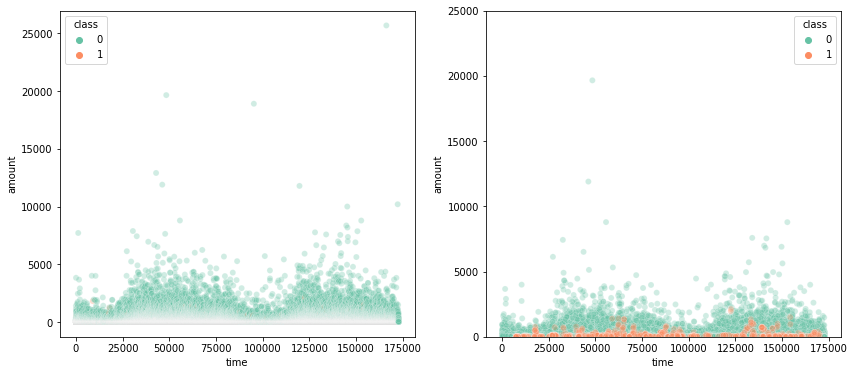

In [51]:
# scatter plot of examples by class label, before and after SMOTE.
fig, ax = plt.subplots(1,2, figsize=(14,6))
sns.scatterplot(df["time"], df["amount"], alpha=0.3, hue= df["class"], ax=ax[0])
sns.scatterplot(X_smote["time"], X_smote["amount"], hue= y_smote, alpha=0.3, ax=ax[1])
ax[1].set_ylim(ymin=0, ymax=25000);

### Logistic Regression with SMOTE

- The steps you are going to cover for this algorithm are as follows:
   
   *i. Train-Test Split (Again)*
   
   *ii. Model Training*
   
   *iii. Prediction and Model Evaluating*
   
   *iv. Plot Precision and Recall Curve*
   
   *v. Apply and Plot StratifiedKFold*

***i. Train-Test Split (Again)***

Use SMOTE applied data.

In [52]:
X_train_scaled = scaler.fit_transform(X_smote) 

X_test_scaled = scaler.transform(X_test)

***ii. Model Training***

In [53]:
log_smote = LogisticRegression(random_state= 42)

In [54]:
log_smote.fit(X_train_scaled, y_smote)

LogisticRegression(random_state=42)

***iii. Prediction and Model Evaluating***

In [55]:
train_pred = log_model.predict(X_train_scaled)

test_pred = log_model.predict(X_test_scaled)

In [56]:
matris_scorer(log_smote, X_train_scaled, y_smote, X_test_scaled, y_test)

Test_Set
[[85258    37]
 [   35   113]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.75      0.76      0.76       148

    accuracy                           1.00     85443
   macro avg       0.88      0.88      0.88     85443
weighted avg       1.00      1.00      1.00     85443


Train_Set
[[99967    33]
 [  162   838]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    100000
           1       0.96      0.84      0.90      1000

    accuracy                           1.00    101000
   macro avg       0.98      0.92      0.95    101000
weighted avg       1.00      1.00      1.00    101000



In [57]:
model_scorer(log_smote, X_train_scaled, y_smote, X_test_scaled, y_test)

,train_set,test_set
Accuracy,0.998,0.999
Precision,0.962,0.753
Recall,0.838,0.764
f1,0.896,0.758


***iv.  Plot Precision and Recall Curve***


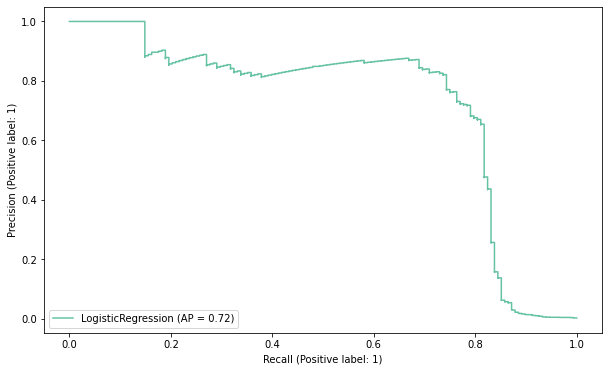

In [58]:
plot_precision_recall_curve(log_smote, X_test_scaled, y_test);

***v. Apply StratifiedKFold***

In [59]:
y_pred_proba = log_smote.predict_proba(X_test_scaled)

In [60]:
precisions, recalls, thresholds = precision_recall_curve(test_pred, y_pred_proba[:,1])

In [61]:
# probability treshold.
optimal_idx = np.argmax((2 * precisions * recalls) / (precisions + recalls))
optimal_threshold = thresholds[optimal_idx]
optimal_threshold

0.970687858152474

In [62]:
kfold(10, log_smote, pd.DataFrame(X_smote), y_smote, optimal_threshold)

Accuracy      99.74%  std 0.04%
Precision-1   96.44%  std 2.62%
Recall-1      76.50%  std 3.80%
F1_score-1    85.24%  std 2.38%


In [64]:
log_smote_f1 = f1_score(y_test, test_pred)
log_smote_recall = recall_score(y_test,test_pred)
log_smote_auc = roc_auc_score(y_test, test_pred)

- Smote grid 

In [65]:
clf_grid = LogisticRegression(random_state= 42, class_weight='balanced',max_iter=1000)

In [66]:

penalty = ["l1", "l2"]
l1_ratio = np.linspace(0, 1, 20)
C = np.logspace(0, 10, 20)
solver = ["saga"] 



param_grid = {"penalty" : penalty,
             
             "C" : C,
              "solver": solver,
              
}

In [67]:
grid_model = GridSearchCV(clf_grid, param_grid = param_grid,scoring= "recall" )

In [68]:
grid_model.fit(X_train_scaled, y_smote)

GridSearchCV(estimator=LogisticRegression(class_weight='balanced',
                                          max_iter=1000, random_state=42),
             param_grid={'C': array([1.00000000e+00, 3.35981829e+00, 1.12883789e+01, 3.79269019e+01,
       1.27427499e+02, 4.28133240e+02, 1.43844989e+03, 4.83293024e+03,
       1.62377674e+04, 5.45559478e+04, 1.83298071e+05, 6.15848211e+05,
       2.06913808e+06, 6.95192796e+06, 2.33572147e+07, 7.84759970e+07,
       2.63665090e+08, 8.85866790e+08, 2.97635144e+09, 1.00000000e+10]),
                         'penalty': ['l1', 'l2'], 'solver': ['saga']},
             scoring='recall')

In [69]:
grid_model.best_params_

{'C': 1.0, 'penalty': 'l1', 'solver': 'saga'}

In [70]:
log_grid_scorer= model_scorer(grid_model, X_train_scaled, y_smote, X_test_scaled, y_test)
log_grid_scorer

,train_set,test_set
Accuracy,0.988,0.987
Precision,0.444,0.107
Recall,0.957,0.858
f1,0.606,0.190


In [ ]:
# recall is good but presicion is very low.
# even though our priority is recall, we expect high precision.

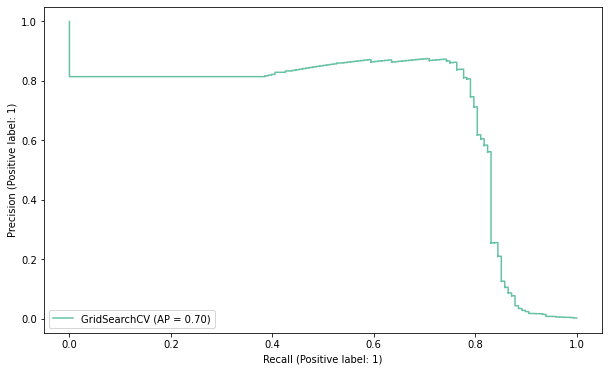

In [71]:
plot_precision_recall_curve(grid_model, X_test_scaled, y_test);

In [72]:
log_grid_f1 = f1_score(y_test, test_pred)
log_grid_recall = recall_score(y_test,test_pred)
log_grid_auc = roc_auc_score(y_test, test_pred)

### Random Forest Classifier with SMOTE

- The steps you are going to cover for this algorithm are as follows:

   *i. Model Training*
   
   *ii. Prediction and Model Evaluating*
   
   *iii. Plot Precision and Recall Curve*
   
   *iv. Apply and Plot StratifiedKFold*
   

***i. Model Training***

In [74]:
rf_model = RandomForestClassifier(min_samples_split=200, random_state=42)
rf_model.fit(X_smote,y_smote)

RandomForestClassifier(min_samples_split=200, random_state=42)

In [75]:
matris_scorer(rf_model, X_smote, y_smote, X_test, y_test)

Test_Set
[[85264    31]
 [   31   117]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.79      0.79      0.79       148

    accuracy                           1.00     85443
   macro avg       0.90      0.90      0.90     85443
weighted avg       1.00      1.00      1.00     85443


Train_Set
[[99974    26]
 [  156   844]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    100000
           1       0.97      0.84      0.90      1000

    accuracy                           1.00    101000
   macro avg       0.98      0.92      0.95    101000
weighted avg       1.00      1.00      1.00    101000



In [76]:
model_scorer(rf_model, X_smote, y_smote, X_test, y_test)

,train_set,test_set
Accuracy,0.998,0.999
Precision,0.970,0.791
Recall,0.844,0.791
f1,0.903,0.791


In [77]:
rf_model = RandomForestClassifier(max_depth=8, random_state=42)
rf_model.fit( X_smote, y_smote)

RandomForestClassifier(max_depth=8, random_state=42)

In [78]:
matris_scorer(rf_model, X_smote, y_smote, X_test, y_test)

Test_Set
[[85274    21]
 [   28   120]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.85      0.81      0.83       148

    accuracy                           1.00     85443
   macro avg       0.93      0.91      0.92     85443
weighted avg       1.00      1.00      1.00     85443


Train_Set
[[99993     7]
 [  133   867]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    100000
           1       0.99      0.87      0.93      1000

    accuracy                           1.00    101000
   macro avg       1.00      0.93      0.96    101000
weighted avg       1.00      1.00      1.00    101000



In [79]:
model_scorer(rf_model,X_smote, y_smote, X_test, y_test)

,train_set,test_set
Accuracy,0.999,0.999
Precision,0.992,0.851
Recall,0.867,0.811
f1,0.925,0.830


In [99]:
y_pred = rf_model.predict(X_test)
rf_model_f1 = f1_score(y_test, y_pred)
rf_model_recall = recall_score(y_test, y_pred)
rf_model_auc = roc_auc_score(y_test, y_pred)

In [85]:
param_grid = {'n_estimators':[50, 100, 300],
             'max_features':[2, 3, 4, 5],
             'max_depth':[3, 5, 7, 9]}

In [86]:
model = RandomForestClassifier(class_weight = "balanced", random_state=42)
rf_grid_model = GridSearchCV(model, param_grid, scoring = "recall", n_jobs = -1, verbose = 2).fit(X_smote, y_smote)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


In [87]:
rf_grid_model.best_params_

{'max_depth': 3, 'max_features': 5, 'n_estimators': 50}

***ii. Prediction and Model Evaluating***

In [88]:
matris_scorer(rf_grid_model, X_smote, y_smote, X_test, y_test)

Test_Set
[[84640   655]
 [   24   124]]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     85295
           1       0.16      0.84      0.27       148

    accuracy                           0.99     85443
   macro avg       0.58      0.92      0.63     85443
weighted avg       1.00      0.99      0.99     85443


Train_Set
[[99323   677]
 [   82   918]]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00    100000
           1       0.58      0.92      0.71      1000

    accuracy                           0.99    101000
   macro avg       0.79      0.96      0.85    101000
weighted avg       0.99      0.99      0.99    101000



In [89]:
model_scorer(rf_grid_model, X_smote, y_smote, X_test, y_test)

,train_set,test_set
Accuracy,0.992,0.992
Precision,0.576,0.159
Recall,0.918,0.838
f1,0.708,0.268


***iii. Plot Precision and Recall Curve***


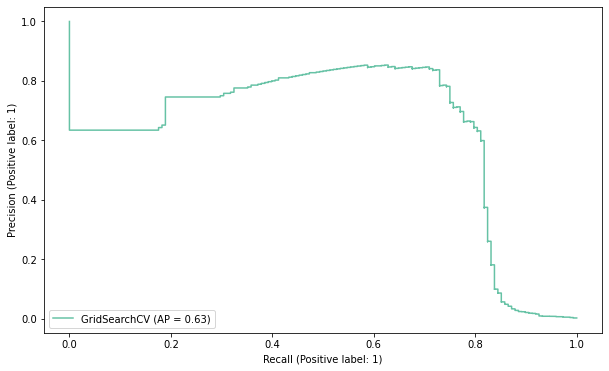

In [90]:
plot_precision_recall_curve(rf_grid_model, X_test, y_test);

In [91]:
y_pred = rf_grid_model.predict(X_test)
rf_grid_model_f1 = f1_score(y_test, y_pred)
rf_grid_model_recall = recall_score(y_test, y_pred)
rf_grid_model_auc = roc_auc_score(y_test, y_pred)

***iv. Apply StratifiedKFold***

In [100]:
rf_kfold = RandomForestClassifier(max_depth= 3, max_features= 5, n_estimators= 50, random_state= 42)


rf_kfold.fit(X_smote, y_smote)

matris_scorer(rf_kfold, X_smote, y_smote, X_test, y_test)

Test_Set
[[85273    22]
 [   37   111]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.83      0.75      0.79       148

    accuracy                           1.00     85443
   macro avg       0.92      0.87      0.89     85443
weighted avg       1.00      1.00      1.00     85443


Train_Set
[[99980    20]
 [  202   798]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    100000
           1       0.98      0.80      0.88      1000

    accuracy                           1.00    101000
   macro avg       0.99      0.90      0.94    101000
weighted avg       1.00      1.00      1.00    101000



In [93]:
from sklearn.metrics import average_precision_score

In [101]:
y_pred_proba = rf_kfold.predict_proba(X_test)
average_precision_score(y_test, y_pred_proba[:,1])

0.7228090663283854

In [102]:
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba[:,1])

In [103]:
optimal_idx = np.argmax((2 * precisions * recalls) / (precisions + recalls))
optimal_threshold = thresholds[optimal_idx]
optimal_threshold

0.34576752580832165

In [104]:
kfold(10, rf_kfold, pd.DataFrame(X_train), y_train, optimal_threshold)

Accuracy      99.93%  std 0.02%
Precision-1   86.89%  std 6.01%
Recall-1      71.50%  std 7.43%
F1_score-1    78.19%  std 5.65%


In [140]:
feats = pd.DataFrame(index=X_smote.columns, data= rf_grid_model.best_estimator_.feature_importances_, columns=["Feature Importance"])
RF_feature_imp = feats.sort_values("Feature Importance", ascending=False)

RF_feature_imp 

,Feature Importance
v14,0.329
v10,0.124
v3,0.108
v4,0.095
v17,0.095
v12,0.077
v16,0.062
v2,0.031
v9,0.021
v7,0.016


In [ ]:
# we can use first 7 features.

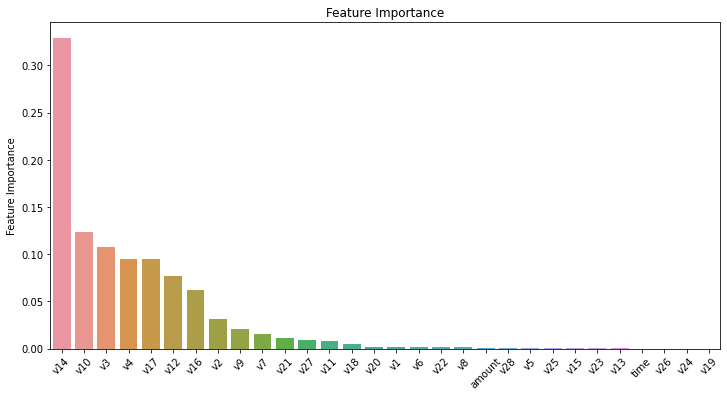

In [141]:
plt.figure(figsize=(12,6))
sns.barplot(y=RF_feature_imp["Feature Importance"], x=RF_feature_imp.index)

plt.title("Feature Importance")
plt.xticks(rotation=45)
plt.show()

In [149]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42, stratify=y)

In [151]:
X_train= X_smote[['v14','v10', 'v3', "v4", 'v17', 'v12','v16']]

In [150]:
X_test= X_test[['v14','v10', 'v3', "v4", 'v17', 'v12','v16']]

In [152]:
rf_grid_model1 = RandomForestClassifier(max_depth= 3, max_features= 5, n_estimators= 50, random_state= 42)
rf_grid_model1.fit( X_train, y_smote)

RandomForestClassifier(max_depth=3, max_features=5, n_estimators=50,
                       random_state=42)

In [153]:
matris_scorer(rf_grid_model1, X_train, y_smote, X_test, y_test)

Test_Set
[[85258    37]
 [   28   120]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.76      0.81      0.79       148

    accuracy                           1.00     85443
   macro avg       0.88      0.91      0.89     85443
weighted avg       1.00      1.00      1.00     85443


Train_Set
[[99968    32]
 [  147   853]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    100000
           1       0.96      0.85      0.91      1000

    accuracy                           1.00    101000
   macro avg       0.98      0.93      0.95    101000
weighted avg       1.00      1.00      1.00    101000



In [154]:
model_scorer(rf_grid_model1, X_train, y_smote, X_test, y_test)

,train_set,test_set
Accuracy,0.998,0.999
Precision,0.964,0.764
Recall,0.853,0.811
f1,0.905,0.787


In [155]:
y_pred = rf_grid_model1.predict(X_test)
rf_grid_model1_f1 = f1_score(y_test, y_pred)
rf_grid_model1_recall = recall_score(y_test, y_pred)
rf_grid_model1_auc = roc_auc_score(y_test, y_pred)

### Neural Network

In the final step, you will make classification with Neural Network which is a Deep Learning algorithm. 

Neural networks are a series of algorithms that mimic the operations of a human brain to recognize relationships between vast amounts of data. They are used in a variety of applications in financial services, from forecasting and marketing research to fraud detection and risk assessment.

A neural network contains layers of interconnected nodes. Each node is a perceptron and is similar to a multiple linear regression. The perceptron feeds the signal produced by a multiple linear regression into an activation function that may be nonlinear.

In a multi-layered perceptron (MLP), perceptrons are arranged in interconnected layers. The input layer collects input patterns. The output layer has classifications or output signals to which input patterns may map. 

Hidden layers fine-tune the input weightings until the neural network’s margin of error is minimal. It is hypothesized that hidden layers extrapolate salient features in the input data that have predictive power regarding the outputs.

You will discover **[how to create](https://towardsdatascience.com/building-our-first-neural-network-in-keras-bdc8abbc17f5)** your deep learning neural network model in Python using **[Keras](https://keras.io/about/)**. Keras is a powerful and easy-to-use free open source Python library for developing and evaluating deep learning models.

- The steps you are going to cover for this algorithm are as follows:

   *i. Import Libraries*
   
   *ii. Define Model*
    
   *iii. Compile Model*
   
   *iv. Fit Model*
   
   *v. Prediction and Model Evaluating*
   
   *vi. Plot Precision and Recall Curve*

***i. Import Libraries***

In [105]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam, Adadelta, RMSprop, Nadam
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

from sklearn.utils import class_weight

***ii. Define Model***

In [116]:
X = df.drop("class",axis=1)
y = df['class'].values

In [117]:
seed = 42

In [118]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size = 0.20, random_state=seed)

In [119]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

***iii. Compile Model***

In [120]:
tf.random.set_seed(42)

model = Sequential()

model.add(Dense(64, input_dim = X_train.shape[1]))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dense(32))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dense(16))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dense(1, activation='sigmoid'))

In [121]:
opt = Adam(lr = 0.005)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['Recall'])

***iv. Fit Model***

In [122]:
early_stop = EarlyStopping(monitor="val_loss",
                           mode="auto",
                           verbose=1,
                           patience=5, restore_best_weights = True)

In [123]:
model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 32, epochs = 200, callbacks=[early_stop], verbose=1)

Epoch 1/200
6409/6409 [==============================] - 21s 3ms/step - loss: 0.0076 - recall: 0.6390 - val_loss: 0.0028 - val_recall: 0.8444
Epoch 2/200
6409/6409 [==============================] - 24s 4ms/step - loss: 0.0036 - recall: 0.7393 - val_loss: 0.0032 - val_recall: 0.8667
Epoch 3/200
6409/6409 [==============================] - 17s 3ms/step - loss: 0.0034 - recall: 0.7593 - val_loss: 0.0039 - val_recall: 0.8667
Epoch 4/200
6409/6409 [==============================] - 18s 3ms/step - loss: 0.0033 - recall: 0.7593 - val_loss: 0.0029 - val_recall: 0.8667
Epoch 5/200
6409/6409 [==============================] - 18s 3ms/step - loss: 0.0031 - recall: 0.7593 - val_loss: 0.0029 - val_recall: 0.8667
Epoch 6/200
6409/6409 [==============================] - 17s 3ms/step - loss: 0.0030 - recall: 0.7593 - val_loss: 0.0028 - val_recall: 0.8667
Epoch 7/200
6409/6409 [==============================] - 19s 3ms/step - loss: 0.0029 - recall: 0.7307 - val_loss: 0.0023 - val_recall: 0.8444
Epoch 

In [124]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 64)                2048      
                                                                 
 batch_normalization_3 (Batc  (None, 64)               256       
 hNormalization)                                                 
                                                                 
 activation_3 (Activation)   (None, 64)                0         
                                                                 
 dense_5 (Dense)             (None, 32)                2080      
                                                                 
 batch_normalization_4 (Batc  (None, 32)               128       
 hNormalization)                                                 
                                                                 
 activation_4 (Activation)   (None, 32)               

In [125]:
loss_df = pd.DataFrame(model.history.history)
loss_df.head()

,loss,recall,val_loss,val_recall
0,0.008,0.639,0.003,0.844
1,0.004,0.739,0.003,0.867
2,0.003,0.759,0.004,0.867
3,0.003,0.759,0.003,0.867
4,0.003,0.759,0.003,0.867


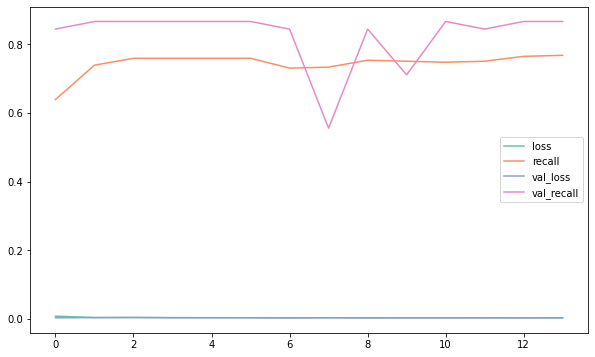

In [126]:
loss_df.plot();

***v. Prediction and Model Evaluating***

In [127]:
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve, roc_auc_score, auc, roc_curve, average_precision_score, precision_recall_curve

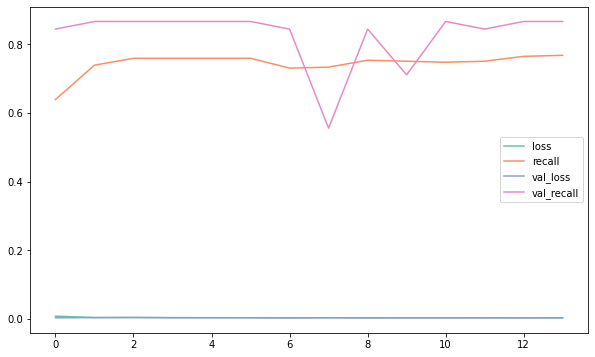

In [128]:
loss_df=pd.DataFrame(model.history.history)
loss_df.plot()

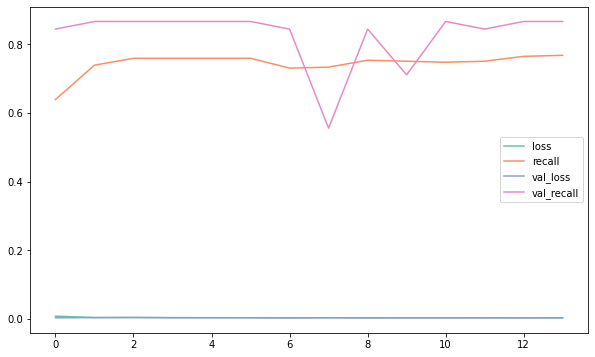

In [129]:
loss_df=pd.DataFrame(model.history.history)
loss_df.plot()

In [130]:
model.evaluate(X_test, y_test, verbose=0) 

[0.002942996332421899, 0.7244898080825806]

In [131]:
loss, recall = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("Recall : ", recall)

loss :  0.002942996332421899
Recall :  0.7244898080825806


In [132]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[56851    13]
 [   27    71]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.85      0.72      0.78        98

    accuracy                           1.00     56962
   macro avg       0.92      0.86      0.89     56962
weighted avg       1.00      1.00      1.00     56962



In [133]:
from sklearn.metrics import precision_recall_curve

***vi. Plot Precision and Recall Curve***

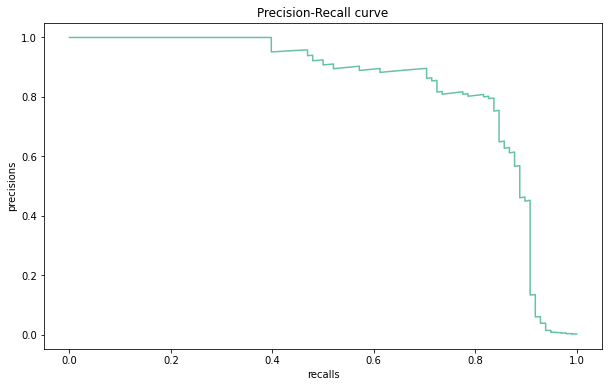

In [135]:
y_pred_proba = model.predict(X_test)
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot(recalls, precisions, label='ANN')
plt.xlabel('recalls')
plt.ylabel('precisions')
plt.title('Precision-Recall curve')
plt.show()

In [136]:
model_f1 = f1_score(y_test, y_pred)
model_recall = recall_score(y_test, y_pred)
model_auc = roc_auc_score(y_test, y_pred)

Comparing:) 


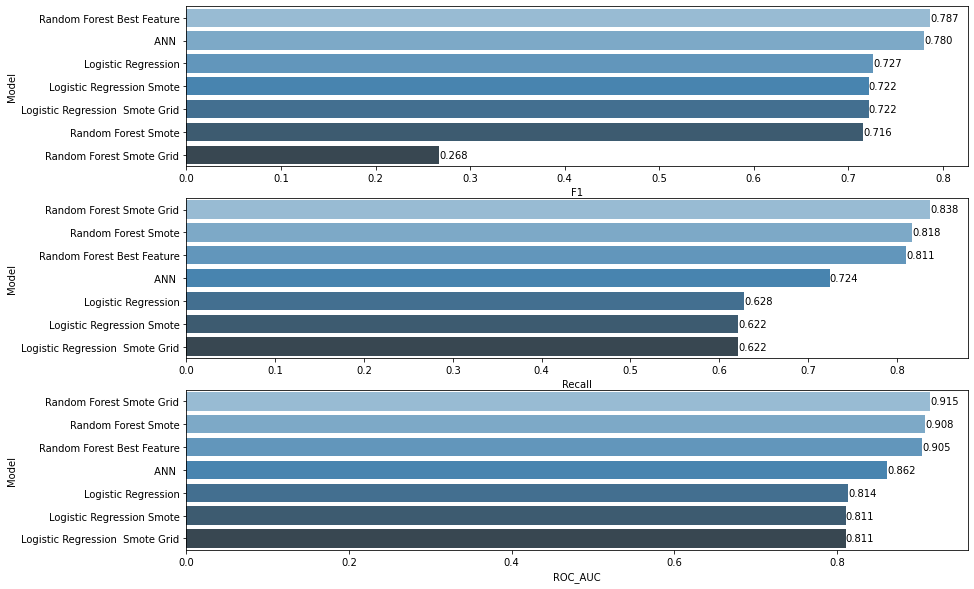

In [156]:
compare = pd.DataFrame({"Model": ["Logistic Regression", "Logistic Regression Smote",
                                 "Logistic Regression  Smote Grid", "Random Forest Smote", "Random Forest Smote Grid","Random Forest Best Feature", " ANN "],
                         
                        "F1": [log_default_f1, log_smote_f1, log_grid_f1, rf_model_f1,  rf_grid_model_f1, rf_grid_model1_f1, model_f1],
                        "Recall": [log_default_recall, log_smote_recall, log_grid_recall, rf_model_recall, rf_grid_model_recall, rf_grid_model1_recall, model_recall],
                        "ROC_AUC": [log_default_auc, log_smote_auc, log_grid_auc, rf_model_auc, rf_grid_model_auc, rf_grid_model1_auc, model_auc]})

def labels(ax):
    for p in ax.patches:
        width = p.get_width()                        
        ax.text(width,                              
                p.get_y() + p.get_height() / 2,      
                '{:1.3f}'.format(width),            
                ha = 'left',                        
                va = 'center')                       
    
plt.figure(figsize=(14,10))
plt.subplot(311)
compare = compare.sort_values(by="F1", ascending=False)
ax=sns.barplot(x="F1", y="Model", data=compare, palette="Blues_d")
labels(ax)

plt.subplot(312)
compare = compare.sort_values(by="Recall", ascending=False)
ax=sns.barplot(x="Recall", y="Model", data=compare, palette="Blues_d")
labels(ax)

plt.subplot(313)
compare = compare.sort_values(by="ROC_AUC", ascending=False)
ax=sns.barplot(x="ROC_AUC", y="Model", data=compare, palette="Blues_d")
labels(ax)
plt.show()

In [ ]:
# we are comparing recall values. random forest seems to be the best model according to recall values.

## 4. Model Deployement
You cooked the food in the kitchen and moved on to the serving stage. The question is how do you showcase your work to others? Model Deployement helps you showcase your work to the world and make better decisions with it. But, deploying a model can get a little tricky at times. Before deploying the model, many things such as data storage, preprocessing, model building and monitoring need to be studied.

Deployment of machine learning models, means making your models available to your other business systems. By deploying models, other systems can send data to them and get their predictions, which are in turn populated back into the company systems. Through machine learning model deployment, can begin to take full advantage of the model you built.

Data science is concerned with how to build machine learning models, which algorithm is more predictive, how to design features, and what variables to use to make the models more accurate. However, how these models are actually used is often neglected. And yet this is the most important step in the machine learning pipline. Only when a model is fully integrated with the business systems, real values ​​can be extract from its predictions.

After doing the following operations in this notebook, jump to a proper IDE and create your web app with Streamlit API.

### Save and Export the Model as .pkl


In [ ]:
# best recall belongs to rf_grid_model1. so we used that model for deployment.

In [157]:
import joblib
joblib.dump(rf_grid_model1, open('rf_model.pkl', 'wb'))

### Save and Export Variables as .pkl

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___